In [1]:
!pip install soundfile
!pip install librosa


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import glob
import soundfile
import os
import sys
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import seaborn as sns
import matplotlib.pyplot as plt

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files.
import librosa
import librosa.display

from IPython.display import Audio

In [3]:
dataset = 'C:\\Users\\HP\\Desktop\\Speech_emotion\\dataset\\'

In [4]:
datasetDirectorylists= os.listdir(dataset)
fileEmotion = []
filePath = []

for dir in datasetDirectorylists:
    audios = os.listdir(dataset + dir)
    for file in audios:
        part = file.split('_')[0]
        fileEmotion.append(part)
        filePath.append(dataset + dir + '/' + file)
emotion_df = pd.DataFrame(fileEmotion, columns = ['Emotions'])
path_df = pd.DataFrame(filePath, columns = ['Path'])
dataset_df = pd.concat([emotion_df, path_df], axis = 1)

In [5]:
dataset_df

,Emotions,Path
0,Anger,C:\Users\HP\Desktop\Speech_emotion\dataset\Mex...
1,Anger,C:\Users\HP\Desktop\Speech_emotion\dataset\Mex...
2,Anger,C:\Users\HP\Desktop\Speech_emotion\dataset\Mex...
3,Anger,C:\Users\HP\Desktop\Speech_emotion\dataset\Mex...
4,Anger,C:\Users\HP\Desktop\Speech_emotion\dataset\Mex...
...,...,...
1145,Sadness,C:\Users\HP\Desktop\Speech_emotion\dataset\Mex...
1146,Sadness,C:\Users\HP\Desktop\Speech_emotion\dataset\Mex...
1147,Sadness,C:\Users\HP\Desktop\Speech_emotion\dataset\Mex...
1148,Sadness,C:\Users\HP\Desktop\Speech_emotion\dataset\Mex...


In [6]:
dataset_df.head()

,Emotions,Path
0,Anger,C:\Users\HP\Desktop\Speech_emotion\dataset\Mex...
1,Anger,C:\Users\HP\Desktop\Speech_emotion\dataset\Mex...
2,Anger,C:\Users\HP\Desktop\Speech_emotion\dataset\Mex...
3,Anger,C:\Users\HP\Desktop\Speech_emotion\dataset\Mex...
4,Anger,C:\Users\HP\Desktop\Speech_emotion\dataset\Mex...


In [7]:
len(dataset_df)

1150

In [8]:
dataPath = pd.concat([dataset_df], axis = 0)
dataPath = dataPath[dataPath.Emotions != "desktop.ini"]
dataPath.to_csv("data_path.csv", index = False)
dataPath.head()


,Emotions,Path
0,Anger,C:\Users\HP\Desktop\Speech_emotion\dataset\Mex...
1,Anger,C:\Users\HP\Desktop\Speech_emotion\dataset\Mex...
2,Anger,C:\Users\HP\Desktop\Speech_emotion\dataset\Mex...
3,Anger,C:\Users\HP\Desktop\Speech_emotion\dataset\Mex...
4,Anger,C:\Users\HP\Desktop\Speech_emotion\dataset\Mex...


In [9]:
dataPath

,Emotions,Path
0,Anger,C:\Users\HP\Desktop\Speech_emotion\dataset\Mex...
1,Anger,C:\Users\HP\Desktop\Speech_emotion\dataset\Mex...
2,Anger,C:\Users\HP\Desktop\Speech_emotion\dataset\Mex...
3,Anger,C:\Users\HP\Desktop\Speech_emotion\dataset\Mex...
4,Anger,C:\Users\HP\Desktop\Speech_emotion\dataset\Mex...
...,...,...
1145,Sadness,C:\Users\HP\Desktop\Speech_emotion\dataset\Mex...
1146,Sadness,C:\Users\HP\Desktop\Speech_emotion\dataset\Mex...
1147,Sadness,C:\Users\HP\Desktop\Speech_emotion\dataset\Mex...
1148,Sadness,C:\Users\HP\Desktop\Speech_emotion\dataset\Mex...


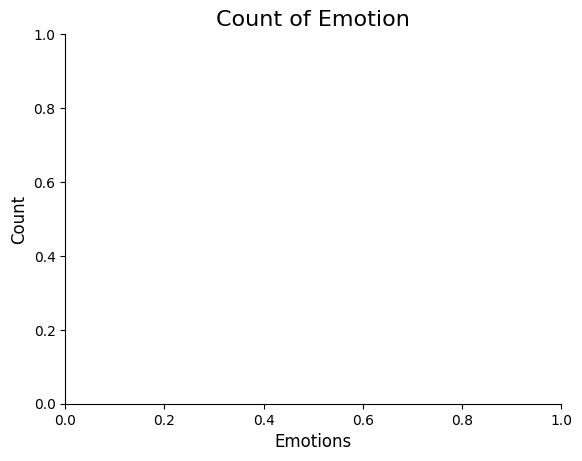

In [10]:
plt.title('Count of Emotion', size = 16)
# sns.countplot(dataPath.Emotions)

plt.ylabel('Count', size = 12)
plt.xlabel('Emotions', size = 12)
sns.despine(top = True, right = True, left = False, bottom = False)
plt.show()

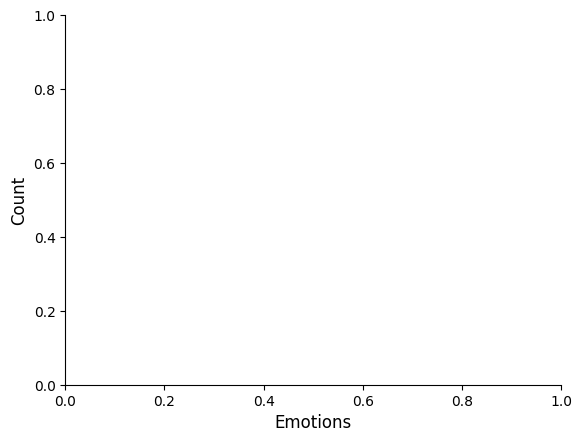

In [11]:
plt.ylabel('Count', size = 12)
plt.xlabel('Emotions', size = 12)
sns.despine(top = True, right = True, left = False, bottom = False)
plt.show()

In [12]:
def createWaveplot(data, sr, e):
    plt.figure(figsize = (10,3))
    plt.title('Waveplot with audio {} emotion'.format(e),size = 15)
    librosa.display.waveshow(data, sr = sr)
    plt.show()

In [13]:
def createSpectrogram(data, sr, e):
    X = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12,3))
    plt.title('spectrogram with audio {} emotion'.format(e), size = 15)
    librosa.display.specshow(xdb, sr = sr, x_axis = 'time', y_axis = 'hz')
    plt.colorbar()

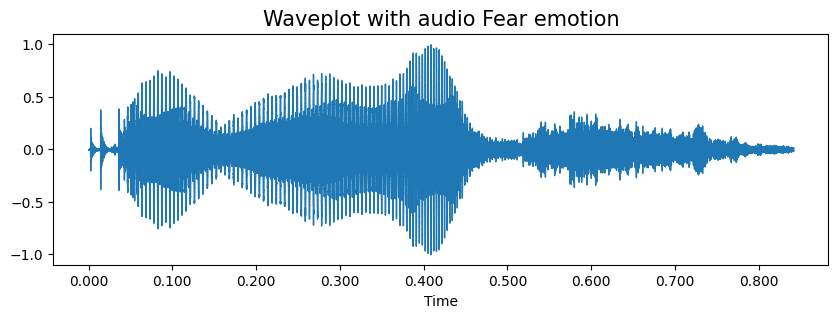

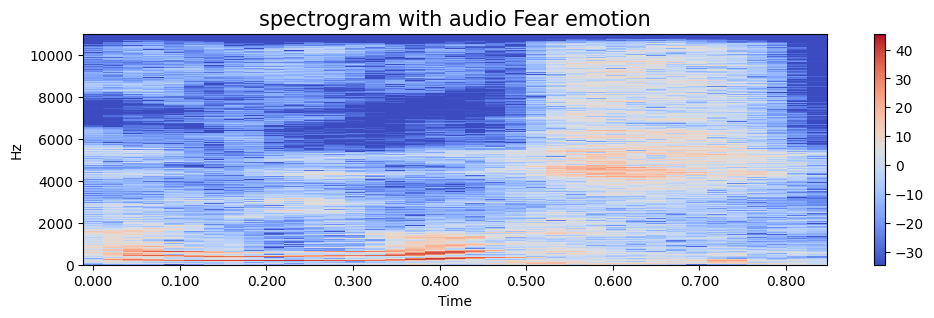

In [14]:
emotion = 'Fear'
path = np.array(dataPath.Path[dataPath.Emotions == emotion])[1]
data, samplingRate = librosa.load(path)
createWaveplot(data, samplingRate, emotion)
createSpectrogram(data,samplingRate, emotion)
Audio(path)

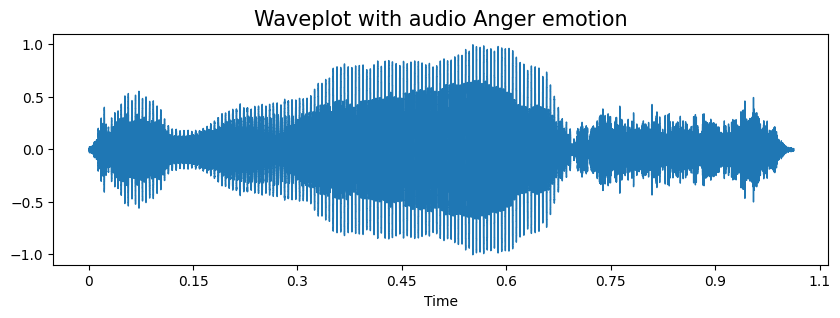

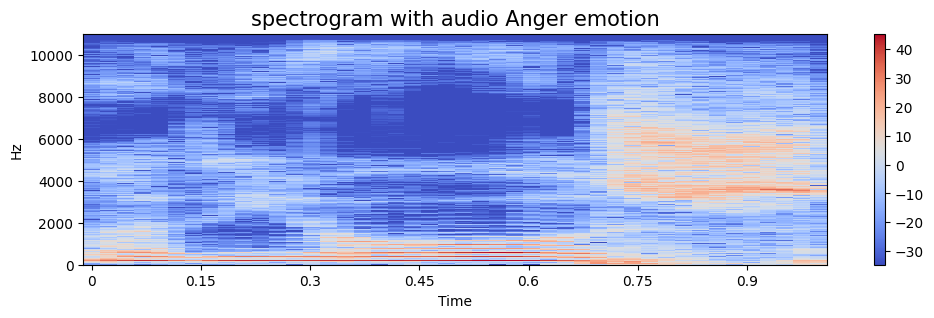

In [15]:
emotion = 'Anger'
path = np.array(dataPath.Path[dataPath.Emotions == emotion])[1]
data, samplingRate = librosa.load(path)
createWaveplot(data, samplingRate, emotion)
createSpectrogram(data,samplingRate, emotion)
Audio(path)

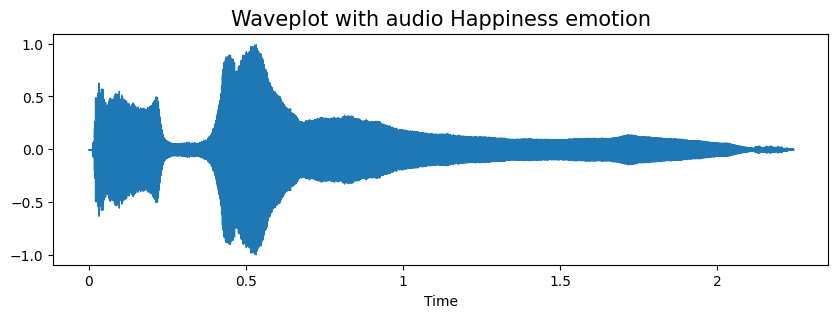

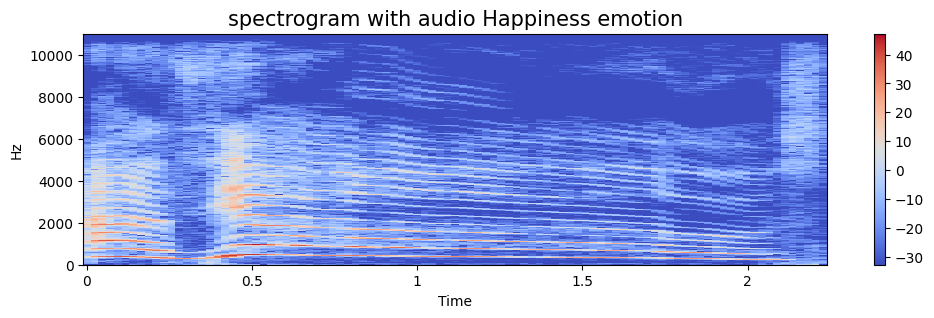

In [16]:
emotion = 'Happiness'
path = np.array(dataPath.Path[dataPath.Emotions == emotion])[1]
data, samplingRate = librosa.load(path)
createWaveplot(data, samplingRate, emotion)
createSpectrogram(data,samplingRate, emotion)
Audio(path)

In [17]:
def noise(data):
    noiseAmp = 0.035*np.random.uniform()*np.amax(data)
    data = data+ noiseAmp * np.random.normal(size = data.shape[0])
    return data
def stretch (data, rate = 0.8):
    return librosa.effects.time_stretch(y=data,rate= rate)

def shift(data):
    shiftRange = int(np.random.uniform(low = -5, high = 5)*1000)
    return np.roll(data, shiftRange)

def pitch(data, samplingrate, pitchFactor = 0.7):
    return librosa.effects.pitch_shift(y= data, sr=samplingRate,  n_steps=0.7)


In [18]:
path = np.array(dataPath.Path)[1]
data, sampleRate = librosa.load(path)

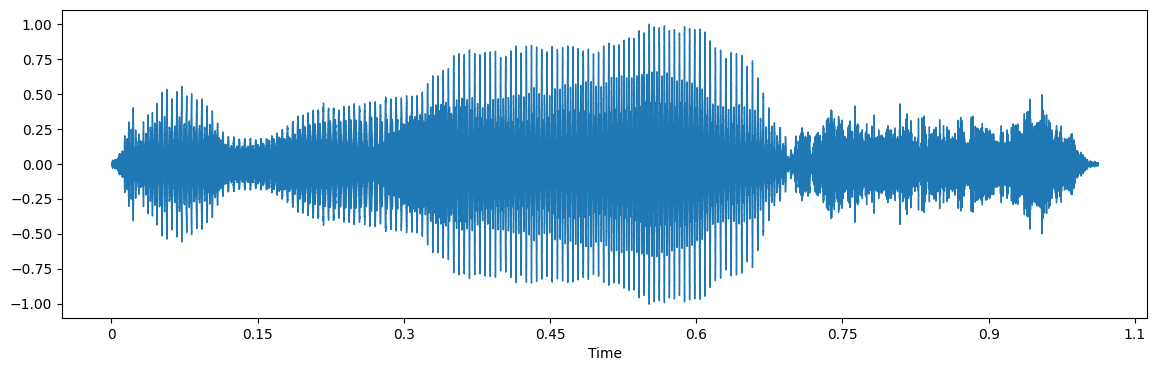

In [19]:
plt.figure(figsize = (14,4))
librosa.display.waveshow(y=data, sr = sampleRate)
Audio(path)

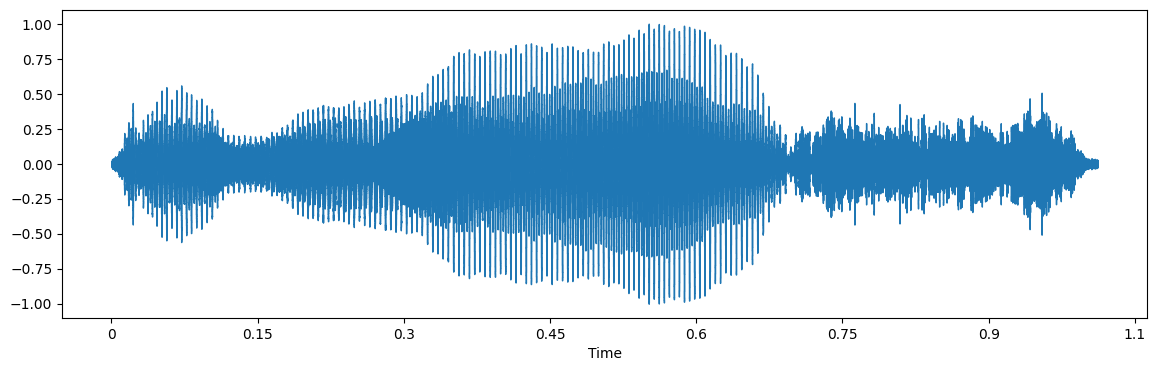

In [20]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr = sampleRate)
Audio(x, rate = sampleRate)

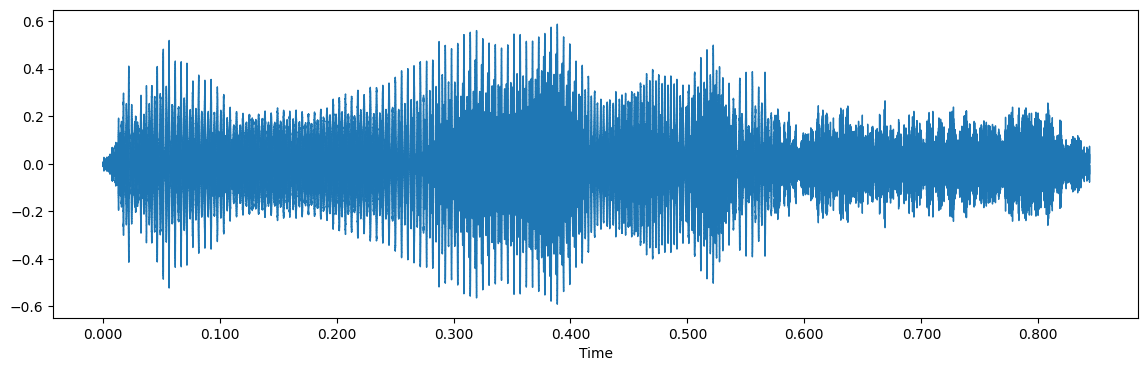

In [21]:
x = stretch(data,1.2)
plt.figure(figsize = (14,4))
librosa.display.waveshow(y=x, sr = sampleRate)
Audio(x, rate = sampleRate)

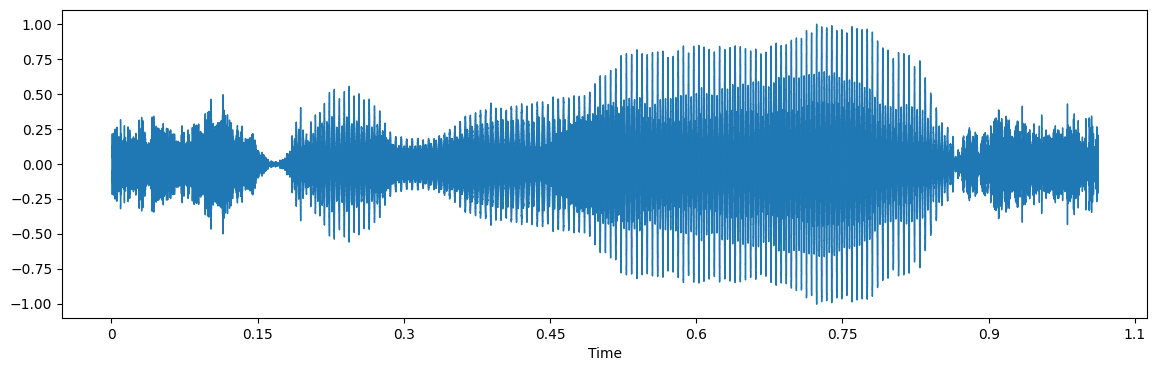

In [22]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr = sampleRate)
Audio(x, rate = sampleRate)

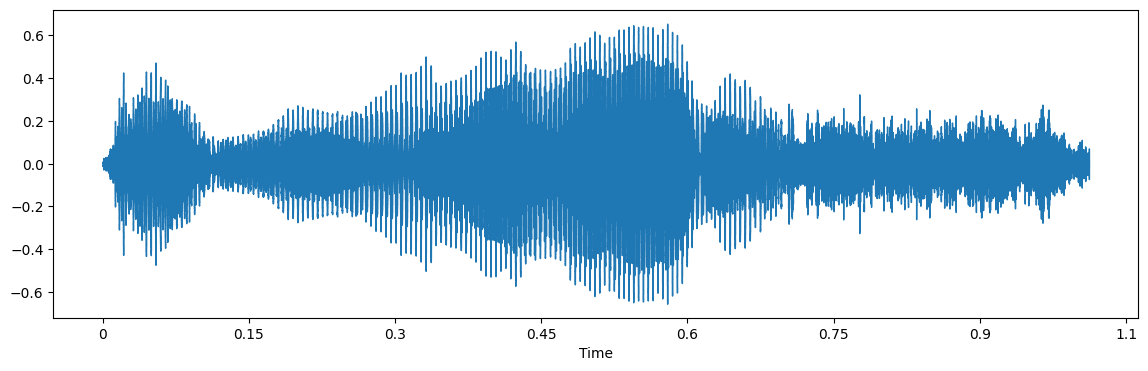

In [23]:
x = pitch(data, sampleRate)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr = sampleRate)
Audio(x, rate = sampleRate)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.svm import SVC

In [25]:
def extractFeature(X, SampleRate, mfcc, chroma, mel):
    if chroma:
        stft = np.abs(librosa.stft(X))
    result = np.array([])
    if mfcc:
        mfccs = np.mean(librosa.feature.mfcc(y = X, sr = sampleRate, n_mfcc=40).T, axis=0)
        result = np.hstack((result,mfccs))
    if chroma:
        chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr = sampleRate).T, axis = 0)
        result = np.hstack((result, chroma))
    if mel:
        mel = np.mean(librosa.feature.melspectrogram(y=X, sr=sampleRate).T, axis=0)
        result = np.hstack((result,mel))
    return result

In [26]:
def loaddata(test_size = 0.2):
    x,y=[],[]
    for dir in datasetDirectorylists:
        audios = os.listdir(dataset + dir)
        for file in audios:
            part = file.split('_')[0]
            
            path = dataset + dir +'\\'+ file
            data, sampleRate = librosa.load(path, duration=0.6, offset=0)
            feature=extractFeature(data, sampleRate, mfcc=True, chroma=True, mel=True)
            x.append(feature)
            y.append(part)
            
    return train_test_split(np.array(x),y,test_size=test_size, random_state=9)

In [27]:
#splittig dataset
xTrain,xTest,yTrain,yTest = loaddata(test_size=0.2)

In [28]:
#getting the shape of training and testsing datasets
print((xTrain.shape[0], xTest.shape[0]))

(920, 230)


In [29]:
#Getting the number of features extracted
print(f'Features extracted: {xTrain.shape[1]}')

Features extracted: 180


In [30]:
print(xTrain[0])

[-1.29351288e+02  8.18917770e+01 -1.93938942e+01  2.53908176e+01
 -9.92176819e+00 -8.12086010e+00 -1.45504475e+01 -2.66076317e+01
  1.52850428e+01 -2.06844311e+01 -5.90706348e+00 -1.23763475e+01
  3.75705576e+00 -1.31730795e+01 -1.45095072e+01 -8.83582020e+00
 -1.40347643e+01 -2.96130037e+00 -1.08493109e+01 -2.49463272e+00
 -1.29176044e+01  2.73483777e+00 -7.01022673e+00 -3.46055698e+00
 -1.22196951e+01  1.07346368e+00 -9.54383564e+00 -1.73716748e+00
 -6.89123821e+00 -2.89493203e+00 -3.57452989e+00 -2.44743094e-01
  4.21566343e+00  1.70411797e+01  1.61852379e+01  2.56439323e+01
  1.02349691e+01  7.98260069e+00 -4.65724516e+00 -6.84931159e-01
  3.87165844e-01  4.69490498e-01  6.35207117e-01  4.71941471e-01
  4.57007259e-01  4.79094207e-01  6.48519933e-01  9.17511106e-01
  6.06604815e-01  4.40184534e-01  4.24441159e-01  4.31945354e-01
  3.76951620e-02  3.80021892e-02  1.96777582e-01  8.07761490e-01
  7.76593864e-01  1.40813994e+00  2.64770050e+02  4.72245544e+02
  1.90737114e+01  8.00856

In [31]:
classifier = SVC(kernel = 'linear', random_state = 11)
classifier.fit(xTrain, yTrain)

SVC(kernel='linear', random_state=11)

In [32]:
y_pred = classifier.predict(xTest)

In [33]:
len(y_pred)

230

In [34]:
#calculating the accuracy of model
accuracy = accuracy_score(y_true=yTest, y_pred = y_pred)

#printing the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 61.74%


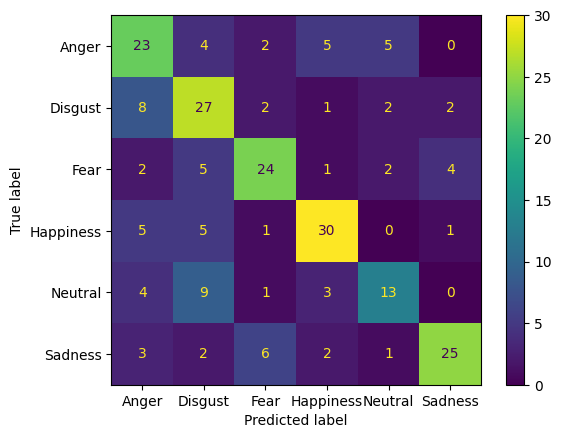

Accuracy of Model is :  0.6173913043478261
              precision    recall  f1-score   support

       Anger       0.51      0.59      0.55        39
     Disgust       0.52      0.64      0.57        42
        Fear       0.67      0.63      0.65        38
   Happiness       0.71      0.71      0.71        42
     Neutral       0.57      0.43      0.49        30
     Sadness       0.78      0.64      0.70        39

    accuracy                           0.62       230
   macro avg       0.63      0.61      0.61       230
weighted avg       0.63      0.62      0.62       230



In [35]:
predictions = classifier.predict(xTest)
cm = confusion_matrix(yTest, predictions, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
plt.show()
print("Accuracy of Model is : ",accuracy_score(yTest,predictions))
print(classification_report(yTest,predictions))

In [36]:
#ensemble learning

In [37]:
dx = []
dy = []
for dir in datasetDirectorylists:
    audios = os.listdir(dataset + dir)
    for file in audios:
        part = file.split('_')[0]

        path = dataset + dir +'\\'+ file
        data, sampleRate = librosa.load(path)
        feature=extractFeature(data, sampleRate, mfcc=True, chroma=True, mel=True)
        dx.append(feature)
        dy.append(part)


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [39]:
clf1 = LogisticRegression(solver='liblinear', max_iter = 1000)
clf2 = RandomForestClassifier()
clf3 = KNeighborsClassifier(n_neighbors=5)
clf4 = SVC(kernel = 'rbf', random_state = 42)
clf5 = GaussianNB()

In [40]:
estimators = [('lr', clf1), ('rf', clf2),('svm',clf4)]

In [41]:
for estimator in estimators:
    x = cross_val_score(estimator[1],dx,dy,cv=15, scoring = 'accuracy')
    print(estimator[0],np.round(np.mean(x),2))

lr 0.6
rf 0.7
svm 0.5


In [42]:
from sklearn.ensemble import VotingClassifier

# Hard Voting

In [43]:
vc = VotingClassifier(estimators = estimators, voting= 'hard')
x = cross_val_score(vc,dx,dy,cv=15, scoring='accuracy')
print(np.round(np.mean(x),2))

0.64


# Soft Voting

In [44]:
vc1 = VotingClassifier(estimators = estimators, voting= 'hard')
x = cross_val_score(vc1,dx,dy, cv=15, scoring='accuracy')
print(np.round(np.mean(x),2))

0.66
